In [1]:
import sys
sys.path.append('C:\\Python310\\Lib\\site-packages')
print (sys.path)
import numpy as np  # imports the `numpy` package and sets an alias
import math # imports built-in module math which provides access to mathematical functions
import matplotlib.pyplot as plt  # basic plotting library
import seaborn as sns # package for data visualisation written by [Michael Waskom](https://mwaskom.github.io/)
import pandas as pd
from scipy import stats
from datetime import datetime, timedelta  
import calendar
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
# pd.set_option("display.notebook_repr_html", False)  # disable "rich" output
import sqlite3
import timeit
plt.style.use('seaborn')
from array import *


print ("pandas", pd.__version__ ) # FYI


conn = sqlite3.connect("/tmp/test5D.db")
# import sklearn
import sklearn
import scipy
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
print ("sklearn", sklearn.__version__ ) # FYI
print ("scipy", scipy.__version__ ) # FYI

sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

['C:\\Users\\Julia', 'C:\\Users\\Julia\\anaconda3\\python39.zip', 'C:\\Users\\Julia\\anaconda3\\DLLs', 'C:\\Users\\Julia\\anaconda3\\lib', 'C:\\Users\\Julia\\anaconda3', '', 'C:\\Users\\Julia\\anaconda3\\lib\\site-packages', 'C:\\Users\\Julia\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\Julia\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Julia\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Julia\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Julia\\.ipython', 'C:\\Python310\\Lib\\site-packages']
pandas 1.4.4
sklearn 1.0.2
scipy 1.9.1


1.4.4 1.0.2 1.9.1

In [2]:
# data = pd.read_csv("C:\Deakin\SIT764\MLAttemptCC_V.csv")
data = pd.read_csv("C:\Deakin\SIT764\MLAttemptCC_V_2.csv")

In [3]:
data

,CC,V,QCC1,QCC2,QCC3,QCC4,QCC5,QCC6,QCC7,QCC8,...,QV11,QV12,QV13,QV14,QV15,QV16,QV17,QV18,QV19,Qualifier
0,CCA,A,0,0,1,1,1,1,1,1,...,0,1,0,1,0,1,0,1,0,Poor
1,CCB,B,0,0,2,1,3,1,0,2,...,0,3,1,3,0,0,2,1,2,Good
2,CCC,C,2,1,2,0,1,0,1,0,...,1,1,0,1,2,1,3,2,1,Fair
3,CCD,D,2,1,2,0,0,3,2,0,...,3,2,3,3,3,3,3,1,3,Excellent
4,CCE,E,0,0,1,0,0,2,1,0,...,1,3,0,0,0,1,1,3,3,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,CCHV,HV,1,2,1,1,1,1,2,1,...,3,3,1,3,0,0,3,3,1,Excellent
204,CCHW,HW,2,1,1,0,1,1,0,0,...,3,3,1,3,0,0,2,3,2,Excellent
205,CCHX,HX,2,0,0,1,0,2,0,0,...,3,2,3,2,3,0,2,2,3,Excellent
206,CCHY,HY,0,0,0,1,0,1,1,1,...,3,1,3,0,0,3,0,2,3,Excellent


In [ ]:
data.sample(10)
print (data.columns)

<AxesSubplot:>

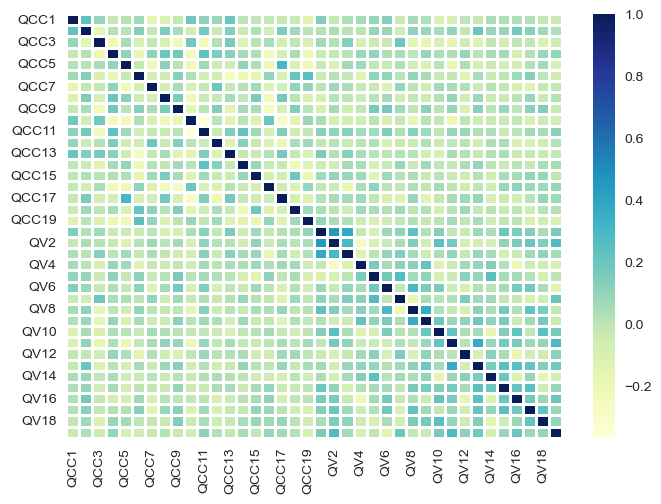

In [59]:
sns.heatmap(data.corr(),cmap = "YlGnBu", linecolor = 'white', linewidths = 1, annot = False)

In [5]:
print (data.describe())
print (data.columns)

             QCC1        QCC2        QCC3        QCC4        QCC5        QCC6  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.995192    0.740385    1.230769    0.990385    0.701923    0.879808   
std      0.945355    0.839774    1.028397    0.932455    0.936432    1.035587   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    1.000000    1.000000    1.000000    0.000000    1.000000   
75%      2.000000    1.000000    2.000000    2.000000    1.000000    1.250000   
max      3.000000    3.000000    3.000000    3.000000    3.000000    3.000000   

             QCC7        QCC8        QCC9       QCC10  ...        QV10  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.918269    0.706731    0.725962    0.899038  ...    1.519231   
std      0.921065    0.965868    0.860793    1.1

In [6]:
X = data.drop(['CC','V'], axis=1)
g = sns.pairplot(X, hue='Qualifier', markers='+')
# # g = sns.pairplot(data, hue='Qualifier', markers='+')
plt.show()

In [7]:
X = data.drop(['CC','V','Qualifier'], axis=1)
y = data['Qualifier']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(208, 38)
(208,)


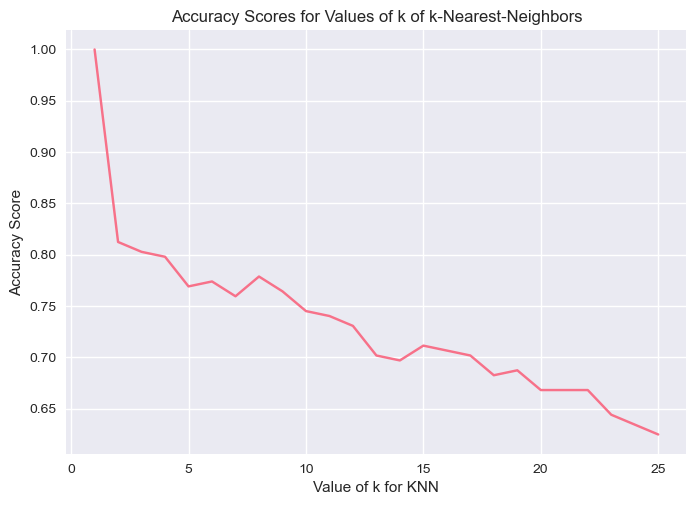

In [8]:
# experimenting with different n values

k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [12]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9759615384615384


## Split the data into a training set and a testing set ##

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(124, 38)
(124,)
(84, 38)
(84,)


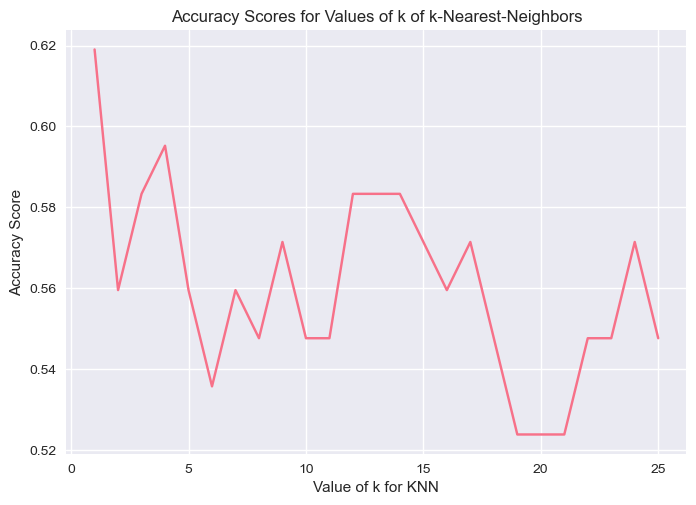

In [18]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [21]:
logreg = LogisticRegression(max_iter=3000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7023809523809523


In [22]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[2,1,2,0,1,0,1,0,0,0,2,1,2,2,1,1,2,0,1,0,0,1,3,1,0,3,0,1,0,3,2,3,1,0,1,1,2,2]])

array(['Fair'], dtype=object)